In [1]:
import os
import time
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = [10, 10, 10, 12, 12, 12, 14, 14, 13, 13, 13, 14, 15, 15, 15, 20, 20, 20, 50, 50, 50, 100, 100, 100, 500, 500,
     500, 1000, 1000, 1000, 2000, 2000, 2000, 3000, 3000, 3000, 3000, 5000, 5000, 5000, 8000, 8000, 8000, 10000, 
     10000, 10000, 15000, 15000, 15000, 20000, 20000, 20000]

y = [2.42442000e-04, 2.59641000e-04, 2.73477001e-04, 2.82788999e-04, 2.72511000e-04, 3.34392000e-04,
     3.35448000e-04, 3.29251000e-04, 3.55400000e-04, 3.52508000e-04, 3.54787000e-04, 3.72141000e-04,
     3.97098000e-04, 4.19190000e-04, 4.36753000e-04, 6.07255000e-04, 6.45901000e-04, 6.73536000e-04,
     3.46088800e-03, 4.06484000e-03, 3.70497400e-03, 1.42201290e-02, 1.39382500e-02, 1.42802470e-02,
     3.35279101e-01, 3.40241623e-01, 3.44218870e-01, 1.49657876e+00, 1.43353197e+00, 1.48890826e+00,
     5.49367414e+00, 5.45882790e+00, 5.45481956e+00, 1.21578574e+01, 1.22822031e+01, 1.26503555e+01,
     1.23393549e+01, 3.37361266e+01, 3.41511317e+01, 3.44987748e+01, 9.28826464e+01, 8.82364701e+01,
     9.01642306e+01, 1.42575947e+02, 1.40702232e+02, 1.40503014e+02, 3.16584916e+02, 3.22833885e+02,
     3.14054201e+02, 5.82822467e+02, 5.48936049e+02, 5.54038225e+02]

y_dist2 = [1.14716000e-04, 9.24209999e-05, 1.26101000e-04, 1.28997999e-04, 1.05674000e-04, 1.06045001e-04,
           1.16309002e-04, 1.07213000e-04, 1.19230001e-04, 1.19790999e-04, 1.17524000e-04, 1.27933999e-04,
           1.32718000e-04, 1.40407999e-04, 1.95949000e-04, 2.34704999e-04, 2.69116998e-04, 2.56468000e-04,
           1.10712700e-03, 1.19355700e-03, 1.21447100e-03, 4.82038100e-03, 4.88564900e-03, 4.83273900e-03,
           1.25124359e-01, 1.26447537e-01, 1.27613615e-01, 5.20778169e-01, 5.17104562e-01, 5.20962803e-01,
           2.06691681e+00, 2.08786947e+00, 2.08952958e+00, 4.68767894e+00, 4.86711237e+00, 4.76108642e+00,
           5.00240178e+00, 1.54682242e+01, 1.50656577e+01, 1.41379107e+01, 3.51408794e+01, 3.60430033e+01,
           3.91080388e+01, 5.49303819e+01, 6.31077902e+01, 5.84781849e+01, 1.39953328e+02, 1.33779537e+02,
           1.34543865e+02, 2.43349670e+02, 2.40852602e+02, 2.40445654e+02]

y_sol_2 = [0.00037654500010830816, 0.001986338999813597, 0.000578010000026552, 0.0007535169997936464, 
           0.0005055200008428073, 0.00078868800028431, 0.0006291029994827113, 0.000801373000285821, 
           0.0007965490003698505, 0.0006477340002675191, 0.0007957569996506209, 0.0007653650000065682,
           0.0012782259991581668, 0.0010210020000158693, 0.0009630680006011971, 0.0010715040007198695,
           0.0012059600003340165, 0.0012793629994121147, 0.04702055899997504, 0.00529886699951021, 
           0.005068834999292449, 0.016863765999914904, 0.01820357700034947, 0.017071539999960805, 
           0.3331923550003921, 0.3333456489999662, 0.33710949900068954, 1.317481320999832, 1.3180662810000285,
           1.3234391999994841, 5.254401619000419, 5.365307987000051, 5.368432911000127, 12.564351314000305, 
           13.832510698999613, 13.082593433999136, 14.73310374599896, 36.0206330660003, 41.34475215400016, 
           35.79306038899995, 92.89644628899987, 95.5377612559987, 105.46597973999997, 159.5395986099993, 
           146.50392317499973, 153.12043765599992, 334.5664164940008, 312.43010085900096, 326.322266485, 
           600.3534990530006, 620.8637601070004, 624.9266152170003]

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

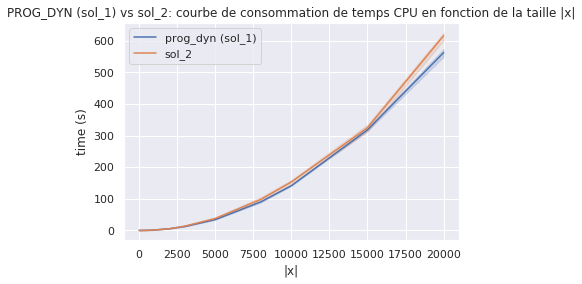

In [4]:
x = np.array(x)
y = np.array(y)
#y_dist2 = np.array(y_dist2)
y_sol_2 = np.array(y_sol_2)

d = {'|x|' : x, 'time (s)' : y}
data = pd.DataFrame(d)
data2 = pd.DataFrame({'|x|' : x, 'time (s)' : y_sol_2})
    
sns.set(style='darkgrid')
sns.lineplot(x='|x|', y='time (s)', data=data, label='prog_dyn (sol_1)')
sns.lineplot(x='|x|', y='time (s)', data=data2, label='sol_2')
plt.title('PROG_DYN (sol_1) vs sol_2: courbe de consommation de temps CPU en fonction de la taille |x|')
plt.savefig('test.png', dpi=300)
plt.show()
